## Turnstile NoteBook

**Challenge 1: Open and Read MTA Data
    
    Notes: Import Things, Initial Tests, Save to Dictionary (Code commented out)

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
#from collections import defaultdict

#df = pd.read_csv('turnstile_180922.txt')
#df=df.rename(columns=lambda x: x.strip())
#df['DATETIME'] = pd.to_datetime(df['DATE']+" "+df['TIME'])
#d=defaultdict(list)
#for index, row in df.iterrows():
 #   d[(row['C/A'],row['UNIT'],row['SCP'],row['STATION'])].append((row['LINENAME'],row['DIVISION'],row['DATE'],row['TIME'],row['DESC'],row['ENTRIES'],row['EXITS']))
#d
#df.head()

In [3]:
path = r'/Users/adamsantos/ds/metis/TurnstileData'
allfiles = glob.glob(path + "/*.txt")
df = []
for file in allfiles:
    df.append(pd.read_csv(file))

df = pd.concat(df, ignore_index=True)
df=df.rename(columns=lambda x: x.strip())
#df.head()

**Challenge 2: Convert to Datetime

    Notes: Added Datetime column to data frame. This takes a while without providing the format!
    

In [4]:
df['DATETIME'] = pd.to_datetime(df['DATE'].apply(str)+" "+df['TIME'],format="%m/%d/%Y %H:%M:%S")

**Challenge 3: Find number of entries per turnstile per daty

    Step 1: Create Unique ID Column for each turnstile

In [5]:
df['UNIQUE ID'] = df['C/A']+df['UNIT']+df['SCP']+df['STATION']

#df.head(10)

Step 2: Sort data by id and date. 
Find difference in turnstile entries
Get rid of entries with no previous entries to subtract.
Take small negative values as positive due to machines reading entries in reverse.
Eliminate very large values (>10000 per turnstile per 4 hour period)

In [6]:
df2=df.sort_values(by=['UNIQUE ID','DATETIME'])
#abs value to take turnstiles that ran in reverse
df2['diff']=abs(df2['ENTRIES'].diff())
df2['FIRST'] = df2.groupby('UNIQUE ID').cumcount()
#get rid of initial time differences
df2 = df2[df2['FIRST'] != 0]
#get rid of extreme values
df2 = df2[abs(df2['diff']) < 10000]
#Make date col datetime obj for later use
df2['DATE'] = pd.to_datetime(df2['DATE'],format="%m/%d/%Y")
df2['Day of the Week'] = df2['DATE'].dt.day_name()
df2['Week #'] = df2['DATE'].dt.week

#df2.head()


To get exits instead of entries

In [64]:
df3=df.sort_values(by=['UNIQUE ID','DATETIME'])
#abs value to take turnstiles that ran in reverse
df3['diff']=abs(df3['EXITS'].diff())
df3['FIRST'] = df3.groupby('UNIQUE ID').cumcount()
#get rid of initial time differences
df3 = df3[df3['FIRST'] != 0]
#get rid of extreme values
df3 = df3[abs(df3['diff']) < 10000]
#Make date col datetime obj for later use
df3['DATE'] = pd.to_datetime(df3['DATE'],format="%m/%d/%Y")
df3['Day of the Week'] = df3['DATE'].dt.day_name()
df3['Week #'] = df3['DATE'].dt.week

df3.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,UNIQUE ID,diff,FIRST,Day of the Week,Week #
1772775,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-26,04:00:00,REGULAR,6633916,2248500,2018-05-26 04:00:00,A002R05102-00-0059 ST,2.0,1,Saturday,21
1772776,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-26,08:00:00,REGULAR,6633928,2248517,2018-05-26 08:00:00,A002R05102-00-0059 ST,17.0,2,Saturday,21
1772777,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-26,12:00:00,REGULAR,6634015,2248577,2018-05-26 12:00:00,A002R05102-00-0059 ST,60.0,3,Saturday,21
1772778,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-26,16:00:00,REGULAR,6634173,2248610,2018-05-26 16:00:00,A002R05102-00-0059 ST,33.0,4,Saturday,21
1772779,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-05-26,20:00:00,REGULAR,6634367,2248645,2018-05-26 20:00:00,A002R05102-00-0059 ST,35.0,5,Saturday,21


Step 4: Sum days together by date

In [7]:
df_totalday=df2.groupby('DATE')['diff'].sum()
df_totalday.head(10)



DATE
2018-05-26    2613439.0
2018-05-27    2402457.0
2018-05-28    2611770.0
2018-05-29    5712078.0
2018-05-30    6083997.0
2018-05-31    6084094.0
2018-06-01    5926684.0
2018-06-02    3375011.0
2018-06-03    2765809.0
2018-06-04    5714168.0
Name: diff, dtype: float64

**Challenge 4: Plot Total Riders versus Date

    Notes: Plot the total riders for each day (NEED TO FIX X-AXIS)

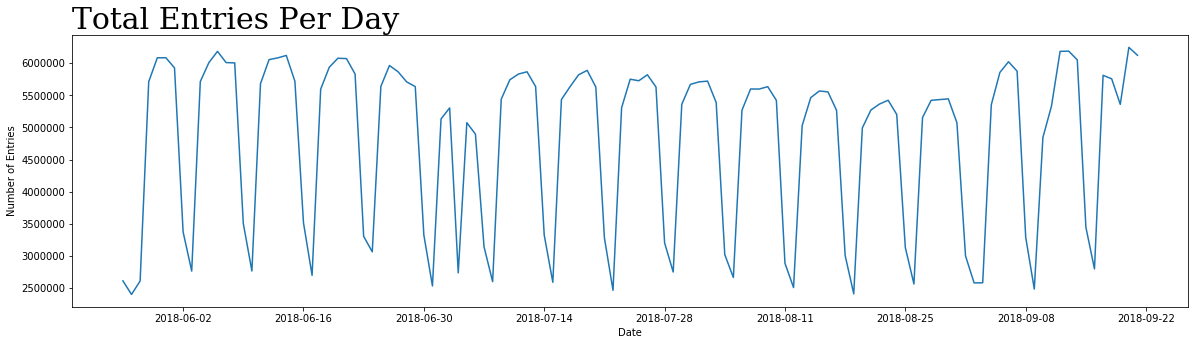

In [8]:
dates = df_totalday.index
counts = df_totalday.values
plt.figure(figsize=(20,5))
plt.plot(dates,counts)
plt.title('Total Entries Per Day',family='serif',fontsize = 30,loc='left',color='k');
plt.xlabel('Date');
plt.ylabel('Number of Entries');
plt.show()

Plot Single Turnstile per day (Not sure why I did this...)

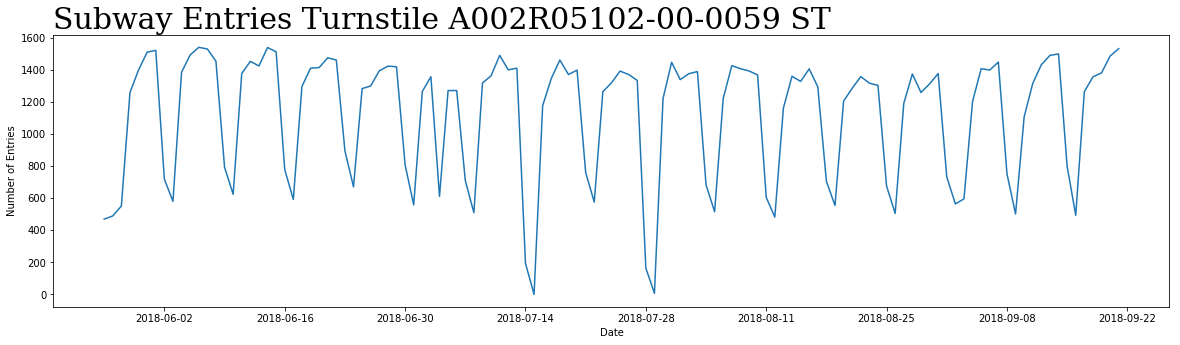

In [9]:
df_singleturnstile = df2.loc[df2['UNIQUE ID'] == 'A002R05102-00-0059 ST']
df_st_day=df_singleturnstile.groupby('DATE')['diff'].sum()
dates = df_st_day.index
counts = df_st_day.values
plt.figure(figsize=(20,5))
plt.plot(dates,counts)
plt.title('Subway Entries Turnstile A002R05102-00-0059 ST',family='serif',fontsize = 30,loc='left',color='k');
plt.xlabel('Date');
plt.ylabel('Number of Entries');
plt.show()
#df_st_day.head(20)

**Challenge 5/6: Get Riders Per C/A, Unit, Station

    Notes: Used groupby to combine turnstile data into station data in entries per day

In [10]:
df_ca_unit_station_day=df2.groupby(['C/A','UNIT','STATION','DATE'])['diff'].sum()
df_station_day = df2.groupby(['STATION','DATE'])['diff'].sum()
df_station_day.head()

STATION  DATE      
1 AV     2018-05-26    12813.0
         2018-05-27    13287.0
         2018-05-28    12572.0
         2018-05-29    20723.0
         2018-05-30    22414.0
Name: diff, dtype: float64

**Challenge 7:

    Notes: Isolated one station to plot entries per day

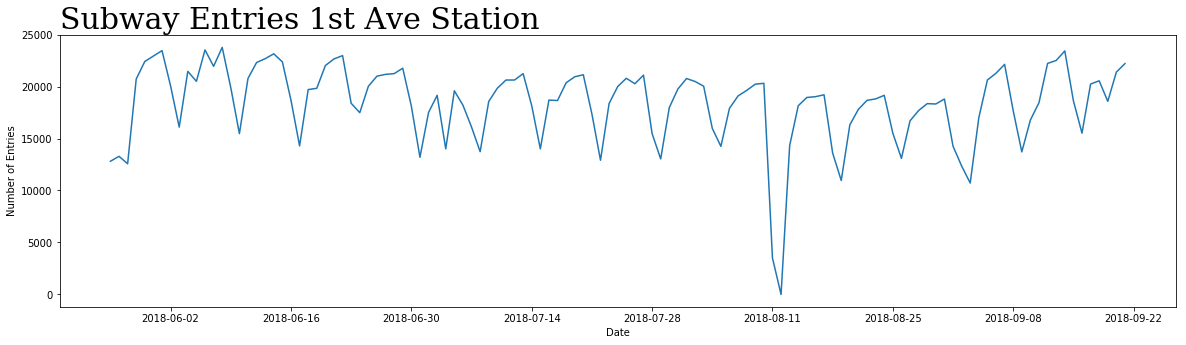

In [11]:
av = df_station_day.reset_index()
av = av[av['STATION']=='1 AV']
dates = av['DATE']
counts = av['diff']
plt.figure(figsize=(20,5))
plt.plot(dates,counts)
plt.title('Subway Entries 1st Ave Station',family='serif',fontsize = 30,loc='left',color='k');
plt.xlabel('Date');
plt.ylabel('Number of Entries');
plt.show()


**Challenge 8: Plot weekly series for one station over many weeks

    Notes: Find days the of the week and week numbers then plot using pandas plotting

    

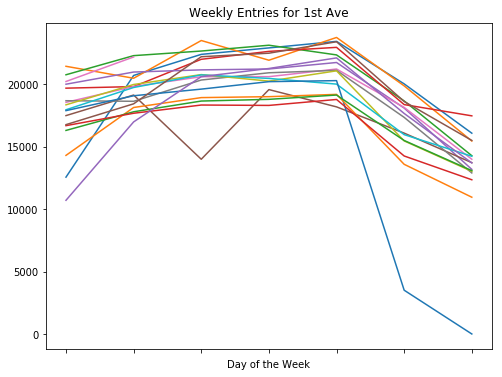

In [13]:
av['DATE'] = pd.to_datetime(av['DATE'])
av['Day of the Week'] = av['DATE'].dt.day_name()
av['Week #'] = av['DATE'].dt.week
#drop weeks that aren't full
av=av.drop([0, 1])
av=av.drop([115,116,117])

#plt.figure(figsize=(20,5))
fig,ax = plt.subplots(figsize=(8,6))
plots = av.groupby('Week #').plot(y='diff',x='Day of the Week',ax=ax,legend=False, title='Weekly Entries for 1st Ave')




**Challenge 9/10: Getting total entries at each station and plotting

In [14]:
df_station_day = df_station_day.to_frame()
df_station = df_station_day.groupby(["STATION"])["diff"].sum()

In [15]:
df_station.sort_values(inplace = True, ascending = False)

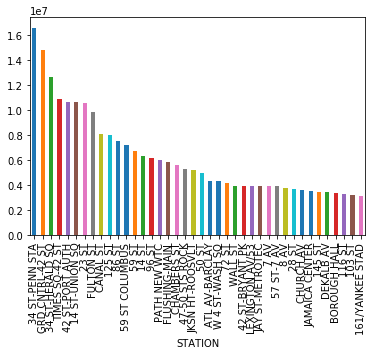

In [16]:
df_station_bar = df_station.iloc[0:40].plot.bar()
df_station_bar
#Very Messy! Will clean up later in notebook!

**Extra Stuff for Presentation
    Goal 1: Find and plot stations with most entries over the whole time period

    Step 1: Add linename to station name to reduce redundancies in station names

In [17]:
#Check if there are blank linenames
df2.head()
df2[df2['LINENAME'] == np.NaN].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,UNIQUE ID,diff,FIRST,Day of the Week,Week #


In [18]:
#Sort linenames in case some are out of order
df2['LINENAME'] = df2['LINENAME'].apply(lambda x: ''.join(sorted(x)))
#df2.head()

In [20]:
df2['UNIQUESTATION'] = df2['STATION']+" "+df2['LINENAME']
#df2.head()

Step 2: Group stations by time and find total entries for each time bucket

In [21]:
station_counts_times = df2.groupby(['UNIQUESTATION','TIME'])['diff'].sum().reset_index()
station_counts_times.sort_values(by='diff',inplace = True, ascending = False)
#station_counts_times.tail()

In [22]:
Topstations = df2.groupby(["UNIQUESTATION"])["diff"].sum().sort_values(ascending=False).head(10).reset_index()
dftop=df2[df2['UNIQUESTATION'].isin(Topstations['UNIQUESTATION'])]

times = dftop.groupby(["UNIQUESTATION",'TIME'])["diff"].sum().sort_values(ascending=False).reset_index()

def bucket_time(time):
    timelist = [1,2,3,4,5,6,7]
    if time > '20:00:00':
        bucket = '6 8pm-12am'
    elif time > '16:00:00':
        bucket = '5 4-8pm'
    elif time >'12:00:00':
        bucket= '4 12-4pm'
    elif time > '08:00:00':
        bucket = '3 8am-12pm'
    elif time > '04:00:00':
        bucket = '2 4-8am'
    else:
        bucket = '1 12-4am'
    return bucket
    
times['Time Bucket'] = times['TIME'].apply(lambda x:bucket_time(x))


# times = times[times['diff']>=20000]
# times_final = times.groupby(['TIME'])["diff"].sum()
# plt.bar(times_final.index,times_final.values)
# plt.show

#times.head()


In [23]:
times['Time Bucket'].value_counts()

3 8am-12pm    1148
4 12-4pm      1061
2 4-8am       1037
5 4-8pm       1033
6 8pm-12am    1013
1 12-4am      1012
Name: Time Bucket, dtype: int64

In [24]:
times_series = times.groupby(["Time Bucket"])["diff"].sum()
#type(times_series)

In [25]:
times_series.index = ['12am-4am','4am-8am','8am-12pm','12pm-4pm','4pm-8pm','8pm-12am']
times_series

12am-4am    12799243.0
4am-8am      5940483.0
8am-12pm    15813381.0
12pm-4pm    15804438.0
4pm-8pm     29390577.0
8pm-12am    12520320.0
Name: diff, dtype: float64

Step 3: Plot Entries by Time of Day

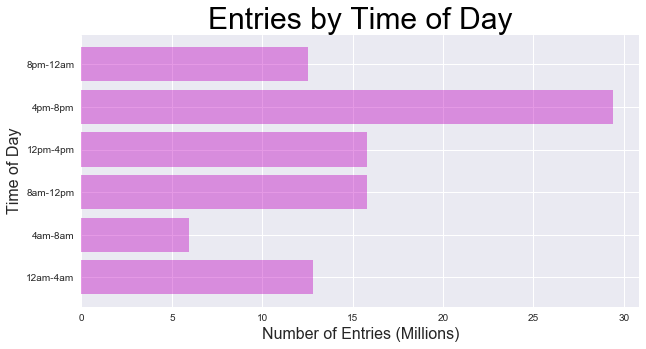

In [27]:
sns.set()
plt.figure(figsize=(10,5))
plt.barh(times_series.index,(times_series.values/1000000),color='m',alpha=.4)

plt.title('Entries by Time of Day',fontsize = 30,color='k',loc='center');
plt.xlabel('Number of Entries (Millions)',fontsize = 16);

plt.ylabel('Time of Day',fontsize = 16);

Step 4: Make a cleaner plot for total entries by station only get top 10

In [28]:
station_counts = df2.groupby(['UNIQUESTATION'])['diff'].sum().reset_index()
station_counts['UNIQUESTATION'] = station_counts['UNIQUESTATION'].str.rsplit(' ', 1)
station_counts[['team1','team2']] = pd.DataFrame(station_counts['UNIQUESTATION'].values.tolist())
station_counts.head()

,UNIQUESTATION,diff,team1,team2
0,"[1 AV, L]",2188801.0,1 AV,L
1,"[103 ST, 1]",1293396.0,103 ST,1
2,"[103 ST, 6]",1259511.0,103 ST,6
3,"[103 ST, BC]",615206.0,103 ST,BC
4,"[103 ST-CORONA, 7]",2023642.0,103 ST-CORONA,7


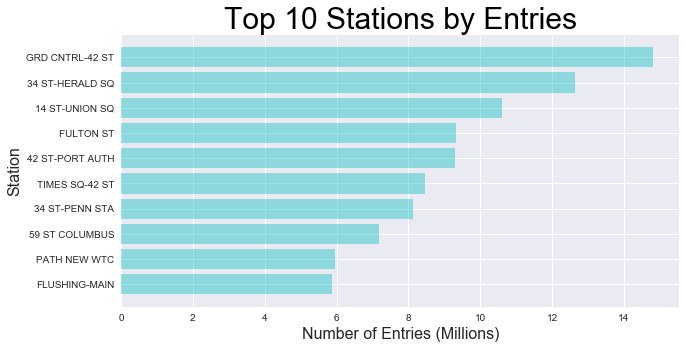

In [53]:
station_counts.sort_values(by = 'diff',inplace = True, ascending = False)

sns.set()
plt.figure(figsize=(10,5))
plt.barh(station_counts['team1'][0:10],station_counts['diff'][0:10]/1000000,color='c',alpha=0.4);
plt.title('Top 10 Stations by Entries',fontsize = 30,color='k',loc='center');
plt.xlabel('Number of Entries (Millions)',fontsize = 16);
#plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.ylabel('Station',fontsize = 16);

Step 5: My attempt at getting entries by time for a single station (NOT USED)

In [31]:
station_times=df2.groupby(['UNIQUESTATION','DATETIME'])['diff'].sum()
station_times = station_times.to_frame().reset_index()
gc_times = station_times.loc[station_times['UNIQUESTATION']=='GRD CNTRL-42 ST 4567S']
gc_times['Day of the Week'] = gc_times['DATETIME'].dt.day_name()
gc_times['Week #'] = gc_times['DATETIME'].dt.week
gc_times['TIME'] = gc_times['DATETIME'].dt.time

gc_times = gc_times.groupby('TIME').filter(lambda x: len(x) > 2)

# gc_filter=gc_times.groupby(['Day of the Week','TIME'])['diff'].mean()
# gc_filter = gc_filter.to_frame().reset_index()

# days = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}
# gc_filter['Day Int'] = gc_filter['Day of the Week'].map(days,gc_filter['Day of the Week'])
#gc_filter['Day of the Week'] = pd.Categorical(gc_filter['Day of the Week'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
#gc_filter = gc_filter.sort_values(by='Day of the Week')

# times = gc_filter['TIME']
# counts = gc_filter['diff']
# plt.figure(figsize=(20,5))
# plt.plot(times,counts)
# plt.title('Grand Central Subway Entries',family='serif',fontsize = 30,loc='left',color='k');
# plt.xlabel('Time of Day');
# plt.ylabel('Number of Entries');
# plt.show()

#gc_times.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

Step 6: Group and plot Entries by day of the week

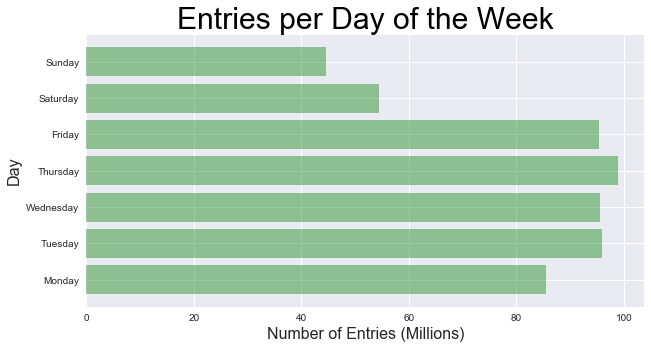

In [32]:
df2.head()
df_days = df2.groupby(['Day of the Week'])['diff'].sum().sort_values().reset_index()

days = {'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
df_days['rank'] = df_days['Day of the Week'].map(days,df_days['Day of the Week'])
df_days = df_days.sort_values(by='rank')
df_days


sns.set()
plt.figure(figsize=(10,5))
plt.barh(df_days['Day of the Week'],(df_days['diff'])/1000000,color='g',alpha=0.4);
plt.title('Entries per Day of the Week',fontsize = 30,color='k',loc='center');
plt.xlabel('Number of Entries (Millions)',fontsize = 16);
plt.ylabel('Day',fontsize = 16);

Step 7: Attempt to merge our dataframe with latitude and longitude of stations
        Need to clean up names with difflib becuase a lot didn't match! (Did not end up using :()

In [34]:
#Try to combine this with other mta data we have
station_loc = pd.read_csv("http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv")
station_loc['Station_Name'] = station_loc['Station_Name'].str.upper()
station_loc.drop(station_loc.columns[5:], axis=1, inplace=True)
station_loc.drop(station_loc.columns[0:2], axis=1, inplace=True)
station_loc = station_loc.rename(columns={'Station_Name': 'STATION'})
#station_loc.head()



#df_merged = pd.merge(df_station,station_loc,on='STATION',how='outer')

#df_station.head()

In [125]:
import difflib



stats=df_station['STATION'].map(lambda x: difflib.get_close_matches(x, station_loc['STATION'], n=1))



In [132]:
stats = [s[0] if s else '' for s in stats]

In [134]:
stats

df_station['NEW STATION'] = stats



,STATION,diff,NEW STATION
0,34 ST-PENN STA,16568998.0,
1,GRD CNTRL-42 ST,14801332.0,GRAND CENTRAL-42ND ST
2,34 ST-HERALD SQ,12651262.0,
3,TIMES SQ-42 ST,10853679.0,TIMES SQUARE-42ND ST
4,42 ST-PORT AUTH,10667959.0,


In [148]:
df_merged2 = pd.merge(df_station,station_loc,left_on='NEW STATION',right_on='STATION',how='left')
df_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1830 entries, 0 to 1829
Data columns (total 6 columns):
STATION_x            1830 non-null object
diff                 1830 non-null float64
NEW STATION          1830 non-null object
STATION_y            1790 non-null object
Station_Latitude     1790 non-null float64
Station_Longitude    1790 non-null float64
dtypes: float64(3), object(3)
memory usage: 100.1+ KB


In [35]:
#df_merged2[df_merged2['Station_Latitude'].isnull()]


Step 8: Attempt to connect to google maps API to get zip codes of subway stations (DOES NOT WORK)

In [29]:
import requests
def loc_to_zipcode(latitude,longitude):
    sensor = 'true'
    base = "http://maps.googleapis.com/maps/api/geocode/json?"
    params = "latlng={lat},{lon}&sensor={sen}".format(
       lat=latitude,
       lon=longitude,
       sen=sensor
   )
    url = "{base}{params}".format(base=base, params=params)
    while True:
        response = requests.get(url).json()
        if(response['status'] == 'OK'):
            result = response['results'][0]
            break
    return result['address_components'][-1]['long_name']

In [30]:
loc_to_zipcode(40.775036,-73.912034)

'11105'

In [31]:
station_loc = pd.read_csv("http://web.mta.info/developers/data/nyct/subway/StationEntrances.csv")
unique_stat_loc = station_loc.drop_duplicates(['Station_Latitude','Station_Longitude'])
unique_stat_loc = unique_stat_loc[['Station_Latitude','Station_Longitude']].reset_index()

In [41]:
def split_df(df,n):
    split_df = []
    i = 0
    while True:
        if i+n > len(df)-1:
            split_df.append(df[i:len(df)].reset_index())
            break
        else:
            split_df.append(df[i:i+n].reset_index())
            i += n
    return split_df

split_df = split_df(unique_stat_loc,20)

In [42]:
import time
test = split_df[0]
zipcodes=[]

for test in split_df[:5]:
    for i in range(len(test['Station_Latitude'])):
        zipcodes.append(loc_to_zipcode(test['Station_Latitude'][i],test['Station_Longitude'][i]))
    time.sleep(300.0)
zipcodes

['11105',
 '11102',
 '11102',
 '11106',
 '11106',
 '11101',
 '10019',
 '3830',
 '10036',
 '5402',
 '10010',
 '10003',
 '6810',
 '3209',
 '10007',
 '10007',
 '10006',
 '10004',
 '11201',
 '11201',
 '11217',
 '11215',
 '11215',
 '11215',
 '11232',
 '11232',
 '11220',
 '1812',
 '11220',
 '11220',
 '11209',
 '11209',
 '7337',
 '11217',
 '11226',
 '11226',
 '11226',
 '4532',
 '5601',
 '11226',
 '3007',
 '11230',
 '11230',
 '11229',
 '11229',
 '11229',
 '11235',
 '11235',
 '11235',
 '11224',
 '11224',
 '11219',
 '11219',
 '11219',
 '11219',
 '11228',
 '11214',
 '11214',
 '11214',
 '11214',
 '11214',
 '5650',
 '4212',
 '11219',
 '11219',
 '2811',
 '11204',
 '11204',
 '1301',
 '3731',
 '11223',
 '11418',
 '11418',
 '11418',
 '11421',
 '11421',
 '11421',
 '11208',
 '2018',
 '1916',
 '11208',
 '11207',
 '11207',
 '11207',
 '11221',
 '11221',
 '11221',
 '11206',
 '11206',
 '11206',
 '11211',
 '11211',
 '3325',
 '10002',
 '11379',
 '11385',
 '11385',
 '11385',
 '11237',
 '11221']